In [1]:
import pandas as pd

iris_data = pd.read_csv('iris.data')
iris_data.head(6)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa


In [2]:
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


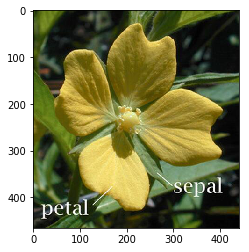

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

img=Image.open('iris.jpg')
plt.imshow(img)
plt.show()

In [5]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


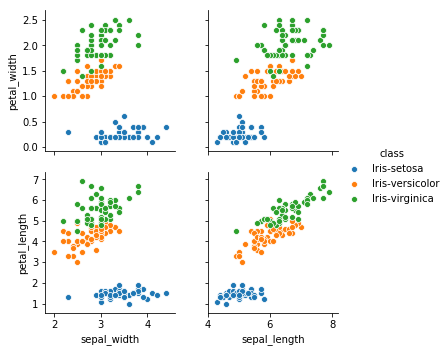

In [6]:
import seaborn as sns

sns.pairplot(iris_data.dropna(), 
             hue='class', 
             x_vars=["sepal_width", "sepal_length"], 
             y_vars=["petal_width", "petal_length"])

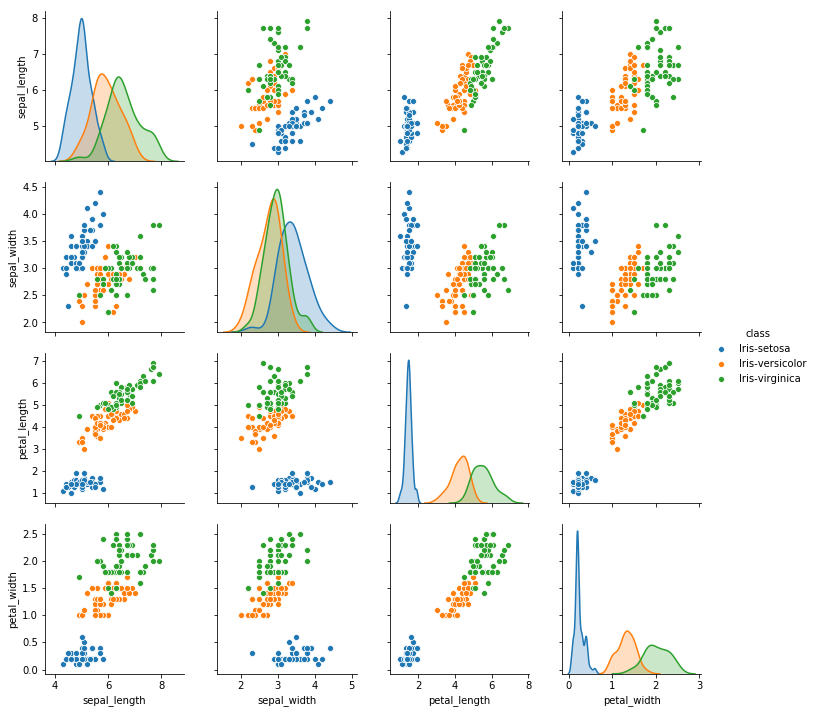

In [7]:
sns.pairplot(iris_data, hue="class")

In [8]:
X = iris_data.iloc[:,0:4].values
y = iris_data['class'].values

In [9]:
from sklearn.preprocessing import StandardScaler

# 标准化数据
X_std = StandardScaler().fit_transform(X)
print (X_std)

[[-1.1483555  -0.11805969 -1.35396443 -1.32506301]
 [-1.3905423   0.34485856 -1.41098555 -1.32506301]
 [-1.51163569  0.11339944 -1.29694332 -1.32506301]
 [-1.02726211  1.27069504 -1.35396443 -1.32506301]
 [-0.54288852  1.9650724  -1.18290109 -1.0614657 ]
 [-1.51163569  0.8077768  -1.35396443 -1.19326436]
 [-1.02726211  0.8077768  -1.29694332 -1.32506301]
 [-1.75382249 -0.34951881 -1.35396443 -1.32506301]
 [-1.1483555   0.11339944 -1.29694332 -1.45686167]
 [-0.54288852  1.50215416 -1.29694332 -1.32506301]
 [-1.2694489   0.8077768  -1.23992221 -1.32506301]
 [-1.2694489  -0.11805969 -1.35396443 -1.45686167]
 [-1.87491588 -0.11805969 -1.52502777 -1.45686167]
 [-0.05851493  2.19653152 -1.46800666 -1.32506301]
 [-0.17960833  3.122368   -1.29694332 -1.0614657 ]
 [-0.54288852  1.9650724  -1.41098555 -1.0614657 ]
 [-0.90616871  1.03923592 -1.35396443 -1.19326436]
 [-0.17960833  1.73361328 -1.18290109 -1.19326436]
 [-0.90616871  1.73361328 -1.29694332 -1.19326436]
 [-0.54288852  0.8077768  -1.18

In [10]:
import numpy as np

# 协方差公式
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('协方差矩阵： \n%s' %cov_mat)

协方差矩阵： 
[[ 1.00675676 -0.10448539  0.87716999  0.82249094]
 [-0.10448539  1.00675676 -0.41802325 -0.35310295]
 [ 0.87716999 -0.41802325  1.00675676  0.96881642]
 [ 0.82249094 -0.35310295  0.96881642  1.00675676]]


In [11]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('特征向量： \n%s' %eig_vecs)
print('\n特征值： \n%s' %eig_vals)

特征向量： 
[[ 0.52308496 -0.36956962 -0.72154279  0.26301409]
 [-0.25956935 -0.92681168  0.2411952  -0.12437342]
 [ 0.58184289 -0.01912775  0.13962963 -0.80099722]
 [ 0.56609604 -0.06381646  0.63380158  0.52321917]]

特征值： 
[2.92442837 0.93215233 0.14946373 0.02098259]


In [12]:
# 累加和
np.cumsum(eig_vals)

array([2.92442837, 3.8565807 , 4.00604443, 4.02702703])

In [13]:
from numpy import mat
new_vec = eig_vecs[:,:2]
print(new_vec)

[[ 0.52308496 -0.36956962]
 [-0.25956935 -0.92681168]
 [ 0.58184289 -0.01912775]
 [ 0.56609604 -0.06381646]]


In [14]:
X_new = X_std.dot(new_vec)
print(X_new)

[[-2.10795032  0.64427554]
 [-2.38797131  0.30583307]
 [-2.32487909  0.56292316]
 [-2.40508635 -0.687591  ]
 [-2.08320351 -1.53025171]
 [-2.4636848  -0.08795413]
 [-2.25174963 -0.25964365]
 [-2.3645813   1.08255676]
 [-2.20946338  0.43707676]
 [-2.17862017 -1.08221046]
 [-2.34525657 -0.17122946]
 [-2.24590315  0.6974389 ]
 [-2.66214582  0.92447316]
 [-2.2050227  -1.90150522]
 [-2.25993023 -2.73492274]
 [-2.21591283 -1.52588897]
 [-2.20705382 -0.52623535]
 [-1.9077081  -1.4415791 ]
 [-2.35411558 -1.17088308]
 [-1.93202643 -0.44083479]
 [-2.21942518 -0.96477499]
 [-2.79116421 -0.50421849]
 [-1.83814105 -0.11729122]
 [-2.24572458 -0.17450151]
 [-1.97825353  0.59734172]
 [-2.06935091 -0.27755619]
 [-2.18514506 -0.56366755]
 [-2.15824269 -0.34805785]
 [-2.28843932  0.30256102]
 [-2.16501749  0.47232759]
 [-1.8491597  -0.45547527]
 [-2.62023392 -1.84237072]
 [-2.44885384 -2.1984673 ]
 [-2.20946338  0.43707676]
 [-2.23112223  0.17266644]
 [-2.06147331 -0.6957435 ]
 [-2.20946338  0.43707676]
 

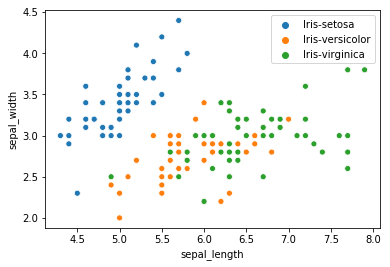

In [15]:
feature_origin = pd.DataFrame(X[:,0:2], columns=['sepal_length', 'sepal_width'])
sns.scatterplot(x='sepal_length', y='sepal_width', hue=y,  data=feature_origin)

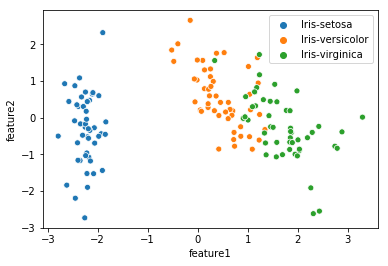

In [16]:
feature_df = pd.DataFrame(X_new, columns=['feature1', 'feature2'])
ax = sns.scatterplot(x='feature1', y='feature2', hue=y,  data=feature_df)
